## Assignment for Week 2 - KNN

### Task 1 - KNN Exercise

**Data Set:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease <br>
Notice, this is the same dataset that you worked with last week.  Feel free to use your cleaned up data file or you can use the one that I have posted in WorldClass. 

**Objective:** Predict heart disease in patients.

* Get to know your data, start out by data exploration. Summarized your finding.

* Divide the data into training set and test set randomly with ratio 80:20.  Make prediction based on 1-nearest neighbor. What is the error rate of this approach? **Error Rate was nearly 65%** Report your results in a confusion matrix. **Confusion matrix found in code block 65**

* Use different values for K, what is the optimal value of K from your experiments? **I found 12 to be the optimal value of k** Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor? **The error rate dropped nearly 20% when using k=12**

* Is there anything else you can do to improve your model? **I thought normalizing the dataset would improve the error rate, but this wasn't the case** If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)




In [68]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

In [38]:
heart = pd.read_csv('assign_wk2/heart.disease.data.clean.csv')

In [39]:
heart.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0
5,56,1,2,120,236,20.0,20.0,0,1,0,178,0,3,0
6,62,0,4,140,268,0.0,0.0,0,1,2,160,0,3,3
7,57,0,4,120,354,0.0,0.0,0,1,0,163,1,3,0
8,63,1,4,130,254,0.0,0.0,0,0,2,147,0,7,2
9,53,1,4,140,203,20.0,25.0,1,1,2,155,1,7,1


In [40]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [43]:
heart[['chol', 'num']].groupby(['num'], as_index=False).mean().sort_values(by='num', ascending=False)

,num,chol
4,4,244.083333
3,3,253.562500
2,2,268.000000
1,1,251.020000
0,0,241.726115


Interestingly, amt of chol fluctuates as num increases. Chol when num=4 is almost the same as chol when num=0

<AxesSubplot:xlabel='sex', ylabel='cigs'>

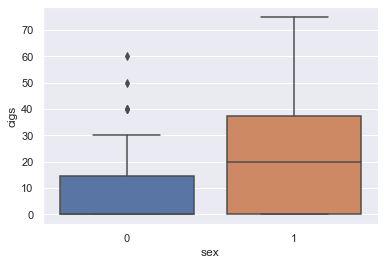

In [44]:
sns.boxplot(x='sex', y='cigs',data=heart)

Per above, males from the dataset smoke siginificantly more than the females from the dataset do

<AxesSubplot:xlabel='num', ylabel='Density'>

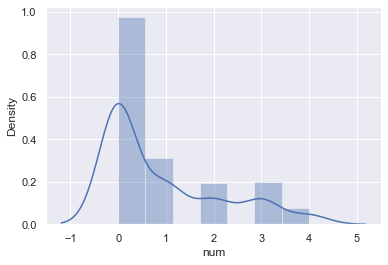

In [45]:
sns.distplot(heart['num'])

Per the histogram,it seems nearly 60% of the dataset has an observed num value of 0. Distribution is skewed to the left.

<AxesSubplot:>

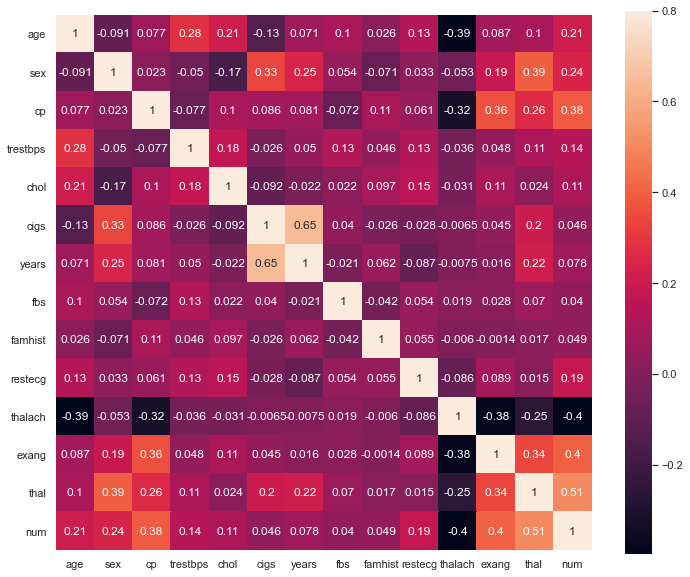

In [46]:
corrmat = heart.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True, annot=True)

In [47]:
cols = heart.columns
target_col = 'num'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
X = heart[feat_cols].values
y = heart[target_col].values

In [48]:
#Divide the data into training set and test set randomly with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [54]:
# gather the predictions model made for test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[1 0 0 0 1 0 1 0 0 0 1 0 2 0 0 0 1 2 0 3 2 0 3 0 0 0 0 2 1 1 0 3 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 3 0 1]


In [55]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1  0  0  1  2  0 -1  1  1  4  2  1 -2  3  0  4 -1  2  0 -3 -2  1 -1  0
  0  0  0  1 -1  1  0 -1  0  2  0  0  1  3 -1  1  3  4  1 -1  0  0  0  3
  0  0  3 -1  0  1 -1  0  2]


In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[20,  6,  2,  1,  0],
       [ 8,  0,  1,  0,  0],
       [ 0,  2,  0,  3,  0],
       [ 4,  4,  1,  0,  0],
       [ 3,  1,  1,  0,  0]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,preds)
error_rate = 1 - accuracy

print(error_rate)

0.6491228070175439


Error rate of nearly 65% confirms the fact that this model is not reliable so far.

In [74]:
scores = []
print(f'Features ==> {feat_cols} \nTarget ====> {target_col}\n')

# remember the ending number for range is not inclusive
for k in range(1, 15):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features ==> ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'famhist', 'restecg', 'thalach', 'exang', 'thal'] 
Target ====> num

Evaluating 1 clusters
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters


In [75]:
scores

[0.3508771929824561,
 0.43859649122807015,
 0.45614035087719296,
 0.49122807017543857,
 0.47368421052631576,
 0.5087719298245614,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.543859649122807,
 0.5614035087719298,
 0.5614035087719298,
 0.543859649122807]

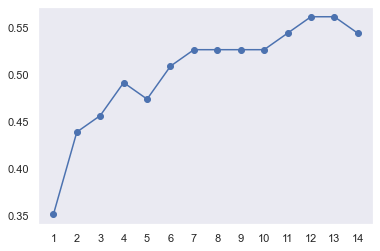

In [76]:
# display the resutls
plt.plot(range(1, 15), scores)
plt.scatter(range(1, 15), scores)
plt.grid()
_ =plt.xticks(range(1, 15))

Per the above, it seems as if k=12 is the optimal value of K

In [77]:
# define and fit our model for k=12
model = KNeighborsClassifier(n_neighbors=12, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=12)

In [78]:
# gather the predictions model made for test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[0 0 0 0 1 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [79]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0 0 0 1 2 0 0 1 0 4 0 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 2 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 0 0 1 2 0 2]


In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[29,  0,  0,  0,  0],
       [ 7,  2,  0,  0,  0],
       [ 5,  0,  0,  0,  0],
       [ 5,  3,  0,  1,  0],
       [ 5,  0,  0,  0,  0]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,preds)
error_rate = 1 - accuracy

print(error_rate)

0.4385964912280702


Aha, the error rate dropped by 20+ percentage points. However, let's see if normalization can lead to an improved rate:

In [82]:
heart.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


There are various columns with quite the spread of observed values, so I would think normalization would be of value here

In [83]:
# we only want to normalize our feature columns in the dataset and I don't want to resplit the dataset.
# So, I will normalize the X_train and X_test only
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_tr_norm = min_max_scaler.fit_transform(X_train)
X_te_norm = min_max_scaler.fit_transform(X_test)

In [84]:
new_heart_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
new_heart_tr['num'] = y_train
new_heart_tr.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,0.458333,1.0,0.666667,0.407895,0.508547,0.000000,0.000000,1.0,0.0,1.0,0.684211,0.0,0.00,0
1,0.687500,0.0,1.000000,0.578947,0.717949,0.266667,0.500000,1.0,1.0,0.0,0.157895,0.0,0.00,2
2,0.416667,1.0,0.333333,0.473684,0.598291,0.333333,0.440000,0.0,0.0,0.0,0.728070,0.0,0.00,0
3,0.812500,1.0,0.666667,0.315789,0.645299,0.026667,0.478785,0.0,0.0,0.0,0.552632,0.0,1.00,0
4,0.625000,1.0,0.333333,0.605263,0.405983,0.266667,0.800000,0.0,1.0,0.0,0.666667,1.0,0.00,0
5,0.583333,1.0,0.333333,0.394737,0.576923,0.266667,0.700000,0.0,0.0,0.0,0.464912,0.0,1.00,1
6,0.562500,1.0,0.333333,0.342105,0.470085,0.266667,0.400000,0.0,1.0,0.0,0.789474,0.0,0.00,0
7,0.479167,1.0,0.333333,0.342105,0.850427,0.400000,0.400000,0.0,1.0,0.0,0.736842,0.0,0.00,0
8,0.583333,1.0,0.666667,0.736842,0.179487,0.200000,0.800000,0.0,1.0,0.0,0.754386,0.0,0.00,0
9,0.583333,1.0,1.000000,0.605263,0.282051,1.000000,0.500000,0.0,0.0,0.0,0.526316,0.0,0.75,0


In [85]:
new_heart_te = pd.DataFrame(X_te_norm,columns=feat_cols)
new_heart_te['num'] = y_test
new_heart_te.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,0.675676,1.0,0.666667,0.384615,0.450,0.428571,0.370370,0.0,1.0,0.0,0.536842,0.0,1.0,0
1,0.189189,0.0,0.666667,0.046154,0.000,0.000000,0.000000,0.0,1.0,0.0,0.842105,0.0,0.0,0
2,0.432432,1.0,0.666667,0.384615,0.525,0.285714,0.277778,1.0,1.0,1.0,0.821053,0.0,0.0,0
3,0.756757,1.0,0.000000,0.507692,0.705,0.285714,0.129630,1.0,1.0,1.0,0.831579,0.0,0.0,1
4,0.567568,0.0,0.333333,0.476923,0.890,0.142857,0.462963,1.0,1.0,1.0,0.600000,0.0,0.0,3
5,1.000000,0.0,0.333333,0.230769,0.640,0.000000,0.000000,0.0,1.0,1.0,0.273684,1.0,0.0,0
6,0.378378,0.0,0.666667,0.538462,0.835,0.285714,0.370370,0.0,1.0,1.0,0.494737,0.0,0.0,0
7,0.432432,1.0,1.000000,0.538462,0.310,0.285714,0.462963,1.0,1.0,1.0,0.631579,1.0,1.0,1
8,0.567568,1.0,1.000000,0.630769,0.385,0.571429,0.370370,0.0,1.0,0.0,0.105263,0.0,1.0,1
9,0.648649,1.0,1.000000,0.507692,0.125,0.571429,0.074074,0.0,1.0,1.0,0.315789,1.0,0.0,4


In [86]:
scores_norm = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model_norm = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model_norm.fit(X_tr_norm, y_train)
    scores_norm.append(model_norm.score(X_te_norm, y_test))

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'famhist', 'restecg', 'thalach', 'exang', 'thal'] 
Target: num
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


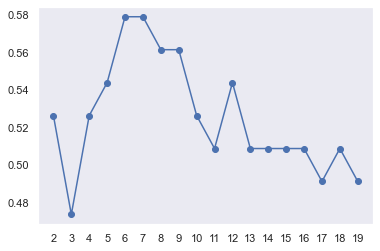

In [87]:
# display the resutls
plt.plot(range(2, 20), scores_norm)
plt.scatter(range(2, 20), scores_norm)
plt.grid()
_ =plt.xticks(range(2, 20))

Looks like 6-7 k is the ideal value. Will go with 6 below

In [88]:
# define and fit our model with k=12
model_norm = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
model_norm.fit(X_tr_norm, y_train)

# gather the predictations that our model made for our test set
preds_norm = model_norm.predict(X_te_norm)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_norm)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[0 0 0 0 0 0 0 1 0 2 3 0 1 2 0 4 0 1 0 0 0 2 1 0 0 0 0 3 0 1 0 2 0 0 0 0 1
 2 0 0 1 2 0 0 0 0 0 1 2 0 0 2 0 0 2 0 1]


In [90]:
differs_norm = y_test - preds_norm

print(f'Differences between the two sets:\n{differs_norm}')

accuracy = accuracy_score(y_test,preds)
error_rate = 1 - accuracy

print(f'error rate: {error_rate}')

Differences between the two sets:
[ 0  0  0  1  3  0  0  0  1  2  0  1 -1  1  0  0  0  3  0  0  0 -1  1  0
  0  0  0  0  0  1  0  0  0  3  0  0  1  1  0  1  3  2  1  0  0  0  0  2
 -2  0  3 -1  0  1  0  0  2]
error rate: 0.4385964912280702


Per above, the error rate remained at ~43% even when normalizing the dataset...not what I was expecting.

### Task 2 - KNN Project
**Data Set:** https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Objective:** Determine whether the product is ‘yes’ or ‘no’ subscription

* Use KNN to provide an analyze of the given data set. Make sure you are answering the stated objective above.

* What is your optimal K? **6 is the optimal k**. What is the accuracy rate? **~88%**

* Discover any insights from this analysis? (include numbers/graphs corresponding to your reasoning) **Based on the code below, knowing a person's job, the number of times a person was contacted prior to the current marketing campaign,how a person perceived the previous marketing campaign, and the monthly consumer confidence index can result in successfully predicting whether or not a person will subscribe a term deposit over 88% of the time.**


### Deliverables:

Upload your notebook's .ipynb file (This assignment can be done on 1 notebook or 2. Your preference.) Please include the jupyter notebook file and a pdf printout of your notebook.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [3]:
# loading our data set
# last portion of code is meant to separate data 
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Creating a copy of the dataset incase I want to revert back to original column types:

In [6]:
bank_copy = bank.copy()

In [7]:
bank_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
bank["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [10]:
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [13]:
bank["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [14]:
bank["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [15]:
bank["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting many categorcial variable values to int's-as seen below I lumped "unknown" into the value with the highest count for each variable:

In [17]:
cleanup_nums = {"housing": {"yes": 1, "no": 0,"unknown": 1},
                "loan":    {"yes": 1, "no": 0,"unknown": 0},
                "default": {"yes": 1, "no": 0,"unknown": 0},
                "y":       {"yes": 1, "no": 0},
                "marital": {"married":0,"unknown":0,"single":1,"divorced":2},
                "job":     {"admin.":0,"unknown":0,"blue-collar":1,"technician":2,"services":3,"management":4,
                            "retired":5,"entrepreneur":6,"self-employed":7,"housemaid":8,"unemployed":9,
                            "student":10},
                "education": {"university.degree":0,"unknown":0,"high.school":1,"basic.9y":2,"professional.course":3,
                              "basic.4y":4,"basic.6y":5,"illiterate":6},
                "poutcome": {"nonexistent":0,"failure":1,"success":2}}

In [18]:
bank = bank.replace(cleanup_nums)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,1,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,0,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
bank.describe()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.427455,0.504807,1.592843,0.000073,0.547878,0.151695,258.285010,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.600579,0.688431,1.567091,0.008534,0.497708,0.358729,259.279249,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


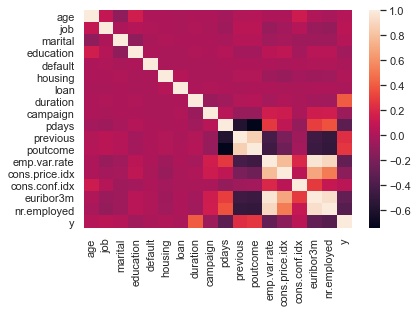

In [21]:
_ = sns.heatmap(bank.corr())

Per above, previous/job/poutcome/cons.conf.idx seem to have strongest correlation with y. Will drop rest of columns below including duration since per the data dictionary duration should be dropped if looking to come up with a predictive model:

In [22]:
# trimming our data
bank.drop(['age','default','cons.price.idx','housing','loan','pdays','contact','month','day_of_week','emp.var.rate', 
           'pdays', 'marital','duration','euribor3m','nr.employed','campaign','education'],axis=1, inplace=True)

In [23]:
bank.head(5)

,job,previous,poutcome,cons.conf.idx,y
0,8,0,0,-36.4,0
1,3,0,0,-36.4,0
2,3,0,0,-36.4,0
3,0,0,0,-36.4,0
4,3,0,0,-36.4,0


Setting up y as target column & remaining as features:

In [24]:
cols = bank.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

X = bank[feat_cols].values
y = bank[target_col].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Outcome for y (subscription) is yes/no therefore discrete...based on this I'll use a KNN Classifier model:

In [27]:
# define and fit model
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [28]:
# gather the predictions model made for test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [29]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0 0 0 ... 0 1 0]


Accuracy_score package in order to score the classification model with the current features

In [30]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.8839524156348628


~88% accuracy of predicting y when using the features involved! I'll take that as a win

In [31]:
scores = []
print(f'Features ==> {feat_cols} \nTarget ====> {target_col}\n')

# remember the ending number for range is not inclusive
for k in range(1, 10):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features ==> ['job', 'previous', 'poutcome', 'cons.conf.idx'] 
Target ====> y

Evaluating 1 clusters
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters


In [32]:
scores

[0.8746054867686331,
 0.8839524156348628,
 0.8803107550376305,
 0.8900218499635834,
 0.8895362952172857,
 0.891964068948774,
 0.8892935178441369,
 0.8914785142024764,
 0.8897790725904345]

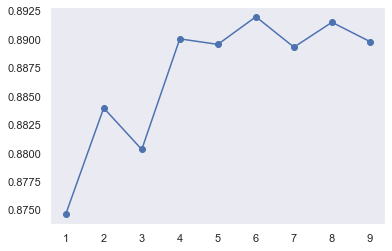

In [33]:
# display the resutls
plt.plot(range(1, 10), scores)
plt.scatter(range(1, 10), scores)
plt.grid()
_ =plt.xticks(range(1, 10))

Per above, 6 is the optimal k

In [36]:
scores = []
print(f'Features ==> {feat_cols} \nTarget ====> {target_col}\n')

# remember the ending number for range is not inclusive
for k in range(1, 7):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features ==> ['job', 'previous', 'poutcome', 'cons.conf.idx'] 
Target ====> y

Evaluating 1 clusters
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters


In [37]:
scores

[0.8746054867686331,
 0.8839524156348628,
 0.8803107550376305,
 0.8900218499635834,
 0.8895362952172857,
 0.891964068948774]